# Paths in AC/DC Subcircuits from Verd 2019 -- Fully Connected (E)

From the actual collected data, I took all the crossings of gene expression levels (where one epression level drops below another) for data from T8. Below is a table describing what is observed in T8 inbetween each crossing. However, in realtion to the network, the actual fixed points here may very.

| A-P | Hb | Gt | Kr | Kni |
| ---- | --- | --- | --- | --- |
| 35 - 40 | H | * | L | 0 |
| 41 - 44 | H | L | * | 0 |
| 45 - 50 | * | 0 | H | L |
| 51 - 56 | L | 0 |H | * |
| 57 - 63 | 0 | L | * | H |
| 64 - 66 | 0 | * | L | H |
| 67 - 75 | 0 | H | L | * |

*: Gene must be 'on', but it is unknown how many thresholds the gene expression is above (if any),

H: Gene is above all of its thresholds

L: Gene is above one threshold but not above all,

0: Gene expression is off. 

In [1]:
import DSGRN
from DSGRN import *

import sys
sys.setrecursionlimit(10**8)
sys.path.insert(0,'/home/elizabeth/Desktop/GIT/dsgrn_acdc/src')

from PGDraw import *
from MGsearchthroughPG import *
from NsearchgoeQuery import *

Initally, I want to to search for each fixed point individually in a fully connected version of the AC/DC subcircuits described in the Verd 2019 paper. 

In [2]:
database = Database("/home/elizabeth/Desktop/ACDC/ACDC_FullconnE.db") 
network = Network("/home/elizabeth/Desktop/ACDC/ACDC_FullconnE")
parameter_graph = ParameterGraph(network)
print(parameter_graph.size())

38416


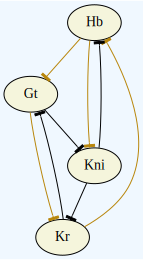

In [3]:
DrawGraph(network)

Lets consider H = 2, * = [0,1], L = 0. If a FP DNE, then change L =1.

In [35]:
AP35 = {"Hb":2, "Gt":[0,1], "Kr":0, "Kni":0}
AP41 = {"Hb":2, "Gt":1, "Kr":[0,1], "Kni":0} #edit
AP45 = {"Hb":[0,1], "Gt":0, "Kr":2, "Kni":0}
AP51 = {"Hb":1, "Gt":0, "Kr":2, "Kni":[0,1]} #edit
AP57 = {"Hb":0, "Gt":0, "Kr":[0,1], "Kni":2} 
AP64 = {"Hb":0, "Gt":[0,1], "Kr":1, "Kni":2} #edit
AP67 = {"Hb":0, "Gt":2, "Kr":0, "Kni":[0,1]}

In [70]:
NFixedPointQuery(database, AP67).matches()

2020-08-10 15:12:27.310541:
MatchQuery({'Hb': 0, 'Gt': 2, 'Kr': 1, 'Kni': [1, 2]}, Matches0)
2020-08-10 15:12:27.311167:
MatchQuery :: built expressions ["Label like 'FP { 0, _, _, _%'", "Label like 'FP { _, 2, _, _%'", "Label like 'FP { _, _, 1, _%'", "Label like 'FP { _, _, _, 1%' or Label like 'FP { _, _, _, 2%'"]
2020-08-10 15:12:27.311493:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 0, _, _, _%';
2020-08-10 15:12:27.312692:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 2, _, _%';
2020-08-10 15:12:27.313548:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 1, _%';
2020-08-10 15:12:27.314175:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where Label like 'FP { _, _, _, 1%' or Label like 'FP { _, _, _, 2%';
2020-08-10 15:12:27.314817:
MatchQuery :: constructed


{82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 137,
 138,
 139,
 160,
 161,
 162,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 287,
 288,
 289,
 290,
 291,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 430,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 520,
 521,
 522,
 523,
 562,
 563,
 564,
 565,
 566,
 656,
 658,
 742}

In [42]:
D = [[AP35], [AP41], [AP45], [AP51], [AP57], [AP64], [AP67]]
M = MGsearchthroughPG(database,'<', '<', D).allpaths()

2020-08-10 14:50:02.357693:
MatchQuery({'Hb': 2, 'Gt': [0, 1], 'Kr': 0, 'Kni': 0}, Matches0)
2020-08-10 14:50:02.358452:
MatchQuery :: built expressions ["Label like 'FP { 2, _, _, _%'", "Label like 'FP { _, 0, _, _%' or Label like 'FP { _, 1, _, _%'", "Label like 'FP { _, _, 0, _%'", "Label like 'FP { _, _, _, 0%'"]
2020-08-10 14:50:02.359034:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 2, _, _, _%';
2020-08-10 14:50:02.360763:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 0, _, _%' or Label like 'FP { _, 1, _, _%';
2020-08-10 14:50:02.361686:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 0, _%';
2020-08-10 14:50:02.362513:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where Label like 'FP { _, _, _, 0%';
2020-08-10 14:50:02.363380:
MatchQuery :: constructed
2020-08-10 14:50:02.371392:
MatchQu

2020-08-10 14:50:05.156371:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 0, _, _%';
2020-08-10 14:50:05.157533:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 2, _%';
2020-08-10 14:50:05.158396:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where Label like 'FP { _, _, _, 0%';
2020-08-10 14:50:05.158953:
MatchQuery :: constructed
2020-08-10 14:50:05.168644:
MatchQuery({'Hb': 1, 'Gt': 0, 'Kr': 2, 'Kni': [0, 1]}, Matches0)
2020-08-10 14:50:05.168999:
MatchQuery :: built expressions ["Label like 'FP { 1, _, _, _%'", "Label like 'FP { _, 0, _, _%'", "Label like 'FP { _, _, 2, _%'", "Label like 'FP { _, _, _, 0%' or Label like 'FP { _, _, _, 1%'"]
2020-08-10 14:50:05.169352:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 1, _, _, _%';
2020-08-10 14:50:05.170847:
MatchQuery :: create temp table tmpMatch

2020-08-10 14:50:09.555856:
MatchQuery :: built expressions ["Label like 'FP { 0, _, _, _%'", "Label like 'FP { _, 0, _, _%' or Label like 'FP { _, 1, _, _%'", "Label like 'FP { _, _, 1, _%'", "Label like 'FP { _, _, _, 2%'"]
2020-08-10 14:50:09.556206:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 0, _, _, _%';
2020-08-10 14:50:09.557251:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 0, _, _%' or Label like 'FP { _, 1, _, _%';
2020-08-10 14:50:09.557984:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 1, _%';
2020-08-10 14:50:09.558486:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where Label like 'FP { _, _, _, 2%';
2020-08-10 14:50:09.558927:
MatchQuery :: constructed
2020-08-10 14:50:09.831673:
MatchQuery({'Hb': 0, 'Gt': 0, 'Kr': [0, 1], 'Kni': 2}, Matches0)
2020-08-10 14:50:09.832109:
MatchQu

In [43]:
M

[[31278, 12070, 12056, 31264, 31262, 31605, 31607, 12399],
 [2466, 12070, 12056, 31264, 31262, 31605, 31607, 12399],
 [9669, 12070, 12056, 31264, 31262, 31605, 31607, 12399],
 [12021, 12070, 12056, 31264, 31262, 31605, 31607, 12399],
 [12071, 12070, 12056, 31264, 31262, 31605, 31607, 12399],
 [12413, 12070, 12056, 31264, 31262, 31605, 31607, 12399],
 [12068, 12070, 12056, 31264, 31262, 31605, 31607, 12399],
 [12077, 12070, 12056, 31264, 31262, 31605, 31607, 12399],
 [19273, 21674, 21660, 31264, 31262, 31605, 31607, 12399],
 [22017, 21674, 21660, 31264, 31262, 31605, 31607, 12399],
 [21675, 21674, 21660, 31264, 31262, 31605, 31607, 12399],
 [31278, 21674, 21660, 31264, 31262, 31605, 31607, 12399],
 [21672, 21674, 21660, 31264, 31262, 31605, 31607, 12399],
 [21625, 21674, 21660, 31264, 31262, 31605, 31607, 12399],
 [21681, 21674, 21660, 31264, 31262, 31605, 31607, 12399],
 [2466, 21674, 21660, 31264, 31262, 31605, 31607, 12399],
 [31277, 31279, 31265, 31264, 31262, 31605, 31607, 12399],


Lets consider H = 2, * = [1,2], L = 1. If a FP DNE, then change L = 0.

In [78]:
AP35 = {"Hb":2, "Gt":[1,2], "Kr":1, "Kni":0}
AP41 = {"Hb":2, "Gt":1, "Kr":[1,2], "Kni":0} 
AP45 = {"Hb":[1,2], "Gt":0, "Kr":2, "Kni":1}
AP51 = {"Hb":1, "Gt":0, "Kr":2, "Kni":[1,2]}
AP57 = {"Hb":0, "Gt":0, "Kr":[1,2], "Kni":2} #edit 
AP64 = {"Hb":0, "Gt":[1,2], "Kr":0, "Kni":2} #edit
AP67 = {"Hb":0, "Gt":2, "Kr":0, "Kni":[1,2]} #edit

In [79]:
D = [[AP35], [AP41], [AP45], [AP51], [AP57], [AP64], [AP67]]
N = MGsearchthroughPG(database,'<', '<', D).allpaths()

2020-08-10 15:24:18.832876:
MatchQuery({'Hb': 2, 'Gt': [1, 2], 'Kr': 1, 'Kni': 0}, Matches0)
2020-08-10 15:24:18.834910:
MatchQuery :: built expressions ["Label like 'FP { 2, _, _, _%'", "Label like 'FP { _, 1, _, _%' or Label like 'FP { _, 2, _, _%'", "Label like 'FP { _, _, 1, _%'", "Label like 'FP { _, _, _, 0%'"]
2020-08-10 15:24:18.837671:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 2, _, _, _%';
2020-08-10 15:24:18.841942:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 1, _, _%' or Label like 'FP { _, 2, _, _%';
2020-08-10 15:24:18.845635:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 1, _%';
2020-08-10 15:24:18.847632:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where Label like 'FP { _, _, _, 0%';
2020-08-10 15:24:18.849496:
MatchQuery :: constructed
2020-08-10 15:24:18.862760:
MatchQu

2020-08-10 15:24:19.944416:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 0, _, _%';
2020-08-10 15:24:19.945182:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 2, _%';
2020-08-10 15:24:19.945780:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where Label like 'FP { _, _, _, 1%';
2020-08-10 15:24:19.946303:
MatchQuery :: constructed
2020-08-10 15:24:19.951588:
MatchQuery({'Hb': 1, 'Gt': 0, 'Kr': 2, 'Kni': [1, 2]}, Matches0)
2020-08-10 15:24:19.951862:
MatchQuery :: built expressions ["Label like 'FP { 1, _, _, _%'", "Label like 'FP { _, 0, _, _%'", "Label like 'FP { _, _, 2, _%'", "Label like 'FP { _, _, _, 1%' or Label like 'FP { _, _, _, 2%'"]
2020-08-10 15:24:19.952319:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 1, _, _, _%';
2020-08-10 15:24:19.953114:
MatchQuery :: create temp table tmpMatch

2020-08-10 15:24:23.373174:
MatchQuery :: built expressions ["Label like 'FP { 0, _, _, _%'", "Label like 'FP { _, 1, _, _%' or Label like 'FP { _, 2, _, _%'", "Label like 'FP { _, _, 0, _%'", "Label like 'FP { _, _, _, 2%'"]
2020-08-10 15:24:23.373430:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 0, _, _, _%';
2020-08-10 15:24:23.374389:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 1, _, _%' or Label like 'FP { _, 2, _, _%';
2020-08-10 15:24:23.375099:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 0, _%';
2020-08-10 15:24:23.375629:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where Label like 'FP { _, _, _, 2%';
2020-08-10 15:24:23.376144:
MatchQuery :: constructed
2020-08-10 15:24:24.999358:
MatchQuery({'Hb': 0, 'Gt': 0, 'Kr': [1, 2], 'Kni': 2}, Matches0)
2020-08-10 15:24:24.999768:
MatchQu

In [80]:
N

[[2959, 22167, 22853, 22851, 23194, 23193, 3985],
 [22168, 22167, 22853, 22851, 23194, 23193, 3985],
 [19766, 22167, 22853, 22851, 23194, 23193, 3985],
 [22174, 22167, 22853, 22851, 23194, 23193, 3985],
 [21824, 22167, 22853, 22851, 23194, 23193, 3985],
 [22118, 22167, 22853, 22851, 23194, 23193, 3985],
 [2959, 22167, 22853, 22851, 22850, 23193, 3985],
 [22168, 22167, 22853, 22851, 22850, 23193, 3985],
 [19766, 22167, 22853, 22851, 22850, 23193, 3985],
 [22174, 22167, 22853, 22851, 22850, 23193, 3985],
 [21824, 22167, 22853, 22851, 22850, 23193, 3985],
 [22118, 22167, 22853, 22851, 22850, 23193, 3985],
 [2959, 22167, 22853, 22851, 23194, 23193, 23291],
 [22168, 22167, 22853, 22851, 23194, 23193, 23291],
 [19766, 22167, 22853, 22851, 23194, 23193, 23291],
 [22174, 22167, 22853, 22851, 23194, 23193, 23291],
 [21824, 22167, 22853, 22851, 23194, 23193, 23291],
 [22118, 22167, 22853, 22851, 23194, 23193, 23291],
 [2959, 22167, 22853, 22851, 22850, 23193, 23291],
 [22168, 22167, 22853, 22851

Lets consider H = 2, * = [0,2], L = 1. If a FP DNE, then change L = 0.

In [102]:
AP35 = {"Hb":2, "Gt":[0,2], "Kr":1, "Kni":0} 
AP41 = {"Hb":2, "Gt":1, "Kr":[0,2], "Kni":0} 
AP45 = {"Hb":[0,2], "Gt":0, "Kr":2, "Kni":1}
AP51 = {"Hb":1, "Gt":0, "Kr":2, "Kni":[0,2]}
AP57 = {"Hb":0, "Gt":0, "Kr":[0,2], "Kni":2} #edit
AP64 = {"Hb":0, "Gt":[0,2], "Kr":0, "Kni":2} #edit
AP67 = {"Hb":0, "Gt":2, "Kr":1, "Kni":[0,2]}

In [103]:
D = [[AP35], [AP41], [AP45], [AP51], [AP57], [AP64]]
O = MGsearchthroughPG(database,'<', '<', D).allpaths()

2020-08-10 15:51:41.151350:
MatchQuery({'Hb': 2, 'Gt': [0, 2], 'Kr': 1, 'Kni': 0}, Matches0)
2020-08-10 15:51:41.151952:
MatchQuery :: built expressions ["Label like 'FP { 2, _, _, _%'", "Label like 'FP { _, 0, _, _%' or Label like 'FP { _, 1, _, _%' or Label like 'FP { _, 2, _, _%'", "Label like 'FP { _, _, 1, _%'", "Label like 'FP { _, _, _, 0%'"]
2020-08-10 15:51:41.152209:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 2, _, _, _%';
2020-08-10 15:51:41.152991:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 0, _, _%' or Label like 'FP { _, 1, _, _%' or Label like 'FP { _, 2, _, _%';
2020-08-10 15:51:41.153764:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 1, _%';
2020-08-10 15:51:41.154374:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where Label like 'FP { _, _, _, 0%';
2020-08-10 15:51:41.154

2020-08-10 15:51:42.412576:
MatchQuery :: constructed
2020-08-10 15:51:43.737588:
MatchQuery({'Hb': [0, 2], 'Gt': 0, 'Kr': 2, 'Kni': 1}, Matches0)
2020-08-10 15:51:43.738020:
MatchQuery :: built expressions ["Label like 'FP { 0, _, _, _%' or Label like 'FP { 1, _, _, _%' or Label like 'FP { 2, _, _, _%'", "Label like 'FP { _, 0, _, _%'", "Label like 'FP { _, _, 2, _%'", "Label like 'FP { _, _, _, 1%'"]
2020-08-10 15:51:43.738286:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 0, _, _, _%' or Label like 'FP { 1, _, _, _%' or Label like 'FP { 2, _, _, _%';
2020-08-10 15:51:43.739819:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 0, _, _%';
2020-08-10 15:51:43.740877:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 2, _%';
2020-08-10 15:51:43.741688:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where 

2020-08-10 15:51:47.470924:
MatchQuery :: constructed
2020-08-10 15:51:49.904596:
MatchQuery({'Hb': 0, 'Gt': 0, 'Kr': [0, 2], 'Kni': 2}, Matches0)
2020-08-10 15:51:49.904986:
MatchQuery :: built expressions ["Label like 'FP { 0, _, _, _%'", "Label like 'FP { _, 0, _, _%'", "Label like 'FP { _, _, 0, _%' or Label like 'FP { _, _, 1, _%' or Label like 'FP { _, _, 2, _%'", "Label like 'FP { _, _, _, 2%'"]
2020-08-10 15:51:49.905275:
MatchQuery :: create temp table tmpMatches1 as select * from MorseGraphAnnotations where Label like 'FP { 0, _, _, _%';
2020-08-10 15:51:49.906400:
MatchQuery :: create temp table tmpMatches2 as select * from tmpMatches1 where Label like 'FP { _, 0, _, _%';
2020-08-10 15:51:49.906971:
MatchQuery :: create temp table tmpMatches3 as select * from tmpMatches2 where Label like 'FP { _, _, 0, _%' or Label like 'FP { _, _, 1, _%' or Label like 'FP { _, _, 2, _%';
2020-08-10 15:51:49.907518:
MatchQuery :: create temp table Matches0 as select * from tmpMatches3 where 

In [104]:
O

[[2959, 22167, 22853, 22851, 23194, 23193],
 [22168, 22167, 22853, 22851, 23194, 23193],
 [19766, 22167, 22853, 22851, 23194, 23193],
 [22174, 22167, 22853, 22851, 23194, 23193],
 [21824, 22167, 22853, 22851, 23194, 23193],
 [22118, 22167, 22853, 22851, 23194, 23193],
 [2959, 22167, 22853, 22851, 22850, 23193],
 [22168, 22167, 22853, 22851, 22850, 23193],
 [19766, 22167, 22853, 22851, 22850, 23193],
 [22174, 22167, 22853, 22851, 22850, 23193],
 [21824, 22167, 22853, 22851, 22850, 23193],
 [22118, 22167, 22853, 22851, 22850, 23193]]

In [44]:
n = 11
c = database.conn.cursor()
PGlist = M[n]
string = 'create temp table C as select * from Signatures where ParameterIndex in ({seq})'.format(
seq=','.join(['?']*len(PGlist)))
c.execute(string, PGlist)
MGindex = [ (row[0], row[1]) for row in c.execute('select * from C')]
c.execute('drop table C')
print('Path:',M[n])
print('Associated MGI:', MGindex) #doesn't come back in order

Path: [31278, 21674, 21660, 31264, 31262, 31605, 31607, 12399]
Associated MGI: [(12399, 739), (21660, 1009), (21674, 180), (31262, 1303), (31264, 724), (31278, 726), (31605, 1303), (31607, 724)]


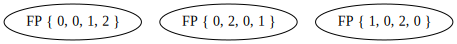

In [45]:
database.DrawMorseGraph(739)